In [43]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import matplotlib.dates as mdates
import seaborn as sns ; sns.set()
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
price = pd.read_csv(r'prices.csv')

In [171]:
price.head()

,date,symbol,open,close,low,high,volume
0,2016-01-05 00:00:00,WLTW,123.43,125.84,122.31,126.25,2.16e+06
1,2016-01-06 00:00:00,WLTW,125.24,119.98,119.94,125.54,2.39e+06
2,2016-01-07 00:00:00,WLTW,116.38,114.95,114.93,119.74,2.49e+06
3,2016-01-08 00:00:00,WLTW,115.48,116.62,113.50,117.44,2.01e+06
4,2016-01-11 00:00:00,WLTW,117.01,114.97,114.09,117.33,1.41e+06


In [217]:
price['symbol'].value_counts().head(10)                         # count the stocks with the most data

XRX    1762
CCI    1762
DHI    1762
HRL    1762
DG     1762
BSX    1762
VAR    1762
L      1762
NOV    1762
BLK    1762
Name: symbol, dtype: int64

In [14]:
price_xrx = price.loc[price['symbol'] == 'XRX']               # new dataframe of just the relevant stock

In [102]:
price_xrx = price_xrx.reset_index().set_index(['date'])       # set index to date

In [53]:
price_xrx = price_xrx.drop(['index', 'symbol', 'close', 'low', 'high', 'volume'], axis=1)       # drop the redundant columns

In [107]:
price_xrx['50day'] = price_xrx['open'].rolling(50).mean()             # 50 day overage
price_xrx['200day'] = price_xrx['open'].rolling(200).mean()            # 200 day overage

In [108]:
pd.set_option('precision', 2)

In [135]:
price_xrx.tail(2)

,open,50day,200day
date,,,
2016-12-29,8.79,9.39,9.81
2016-12-30,8.72,9.37,9.80


In [312]:
price_stock = price.loc[price['symbol'] == 'DG']    
price_stock['50day'] = price_stock['open'].rolling(50).mean()             # 50 day overage
price_stock['200day'] = price_stock['open'].rolling(200).mean() 

C:\Users\Student\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Student\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


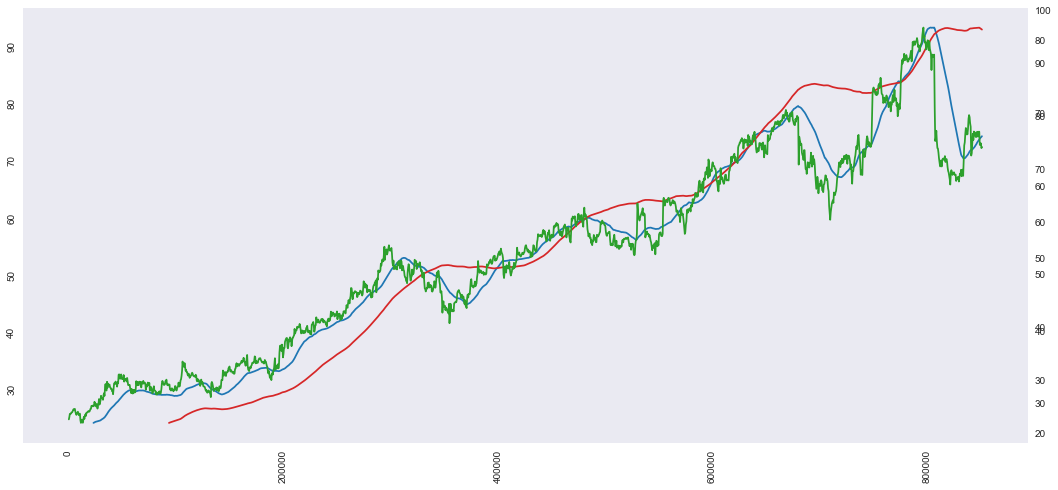

In [313]:
fig, ax1 = plt.subplots(figsize=(18,8))

ax1.plot(price_stock['50day'], color='tab:blue')
ax1.tick_params(labelrotation=90)
ax1.grid(False)
ax2 = ax1.twinx()
ax2.plot(price_stock['200day'], color='tab:red')
ax2.grid(False)
ax3 = ax1.twinx()
ax3.plot(price_stock['open'], color='tab:green')
ax3.grid(False)
#
#ax1.set_xlim([500,1000])

In [314]:
wallet = 10000
stock_count = 0
stock_value = 0

for index,row in price_stock.iterrows():
    
    if np.isnan(row['200day']) == False:
        
        #BUY STOCK
        if row['200day'] >= row['50day']: 
            if wallet > 0:
                amount = (wallet * 0.1) // row['open']
                wallet = wallet - (amount * row['open'])
                stock_count = stock_count + amount
                stock_value = stock_count * row['open']
                            
        #SELL STOCK
        else:
            if stock_count > 0:
                wallet = wallet + (stock_count*row['open'])
                stock_count = 0
                stock_value = 0

print('Time-Period  : ', (price_stock.shape[0])/365, 'years')
print('wallet       : ', wallet)
print('stock count  : ', stock_count)
print('stock value  : ', stock_value)
print('net          : ', ((wallet+stock_value) -10000))

Time-Period  :  4.8273972602739725 years
wallet       :  658.8697790000007
stock count  :  232.0
stock value  :  17191.199536
net          :  7850.069315000001


In [113]:
diff = price_xrx['50day'] < price_xrx['200day']
diff_forward = diff.shift(1)

crossing = np.where(abs(diff - diff_forward) == 1)[0]
print(price_xrx.iloc[crossing])

             open  50day  200day
date                            
2011-04-27  10.12  10.61   10.61
2012-04-24   8.08   8.17    8.16
2012-05-18   7.30   7.96    7.96
2013-02-07   8.00   7.28    7.27
2015-04-07  12.97  13.28   13.29
2016-04-18  11.19  10.23   10.22
2016-06-15   9.75  10.03   10.03


In [172]:
price_xrx.head()

,open,50day,200day
date,,,
2010-01-04,8.54,NaN,NaN
2010-01-05,8.63,NaN,NaN
2010-01-06,8.64,NaN,NaN
2010-01-07,8.53,NaN,NaN
2010-01-08,8.58,NaN,NaN


In [118]:
True - True

0